<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/StockPrediction_QuandlAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a90961044ed09f786891a7ae40963cdaa214838d1a7d6f64b982ebcdfeffba6f
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import statsmodels.tsa.stattools as sts
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

In [0]:
# importing data
co1 = 'CNQ'
co2 = 'PXD'
tickers = co1 + " " + co2
raw_data = yfinance.download (tickers = tickers, interval = '1d', group_by = 'ticker',auto_adjust = True, treads = True)

[*********************100%***********************]  2 of 2 completed


In [0]:
raw_data[co1][0:4].Close

Date
1997-08-08   NaN
1997-08-11   NaN
1997-08-12   NaN
1997-08-13   NaN
Name: Close, dtype: float64

[]

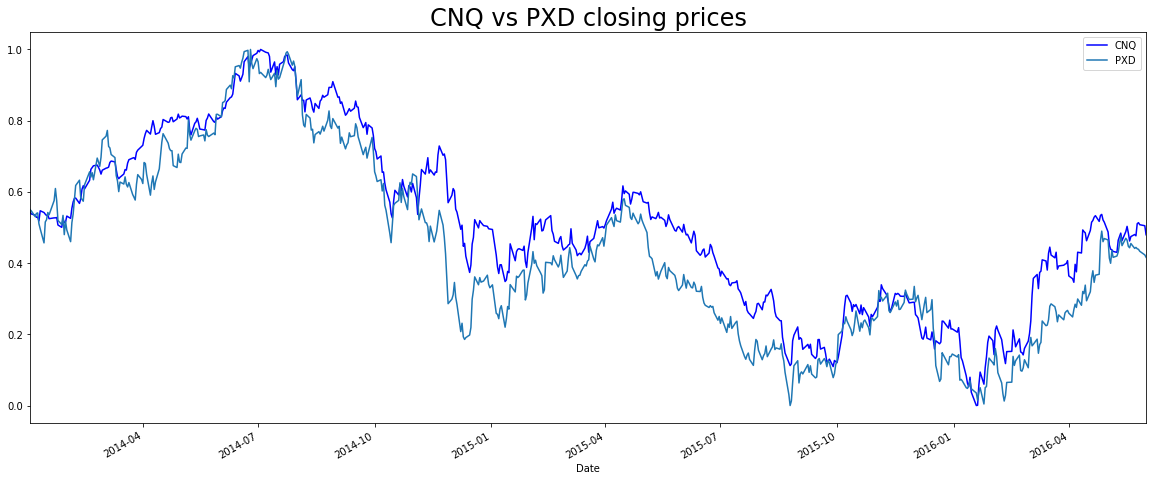

In [0]:
# defining interval for analysis
start = '2014-01-01'
end = '2016-06-01'
cnq = pd.DataFrame(raw_data[co1][start:end].Close)
pxd = pd.DataFrame(raw_data[co2][start:end].Close)
# filling data gaps
cnq = cnq.fillna(method = 'bfill')
pxd = pxd.fillna(method = 'bfill')
# renaming columns
cnq = cnq.rename(columns = {'Close': 'CNQ'})
pxd = pxd.rename(columns = {'Close': 'PXD'})
# normalizing data
cnq = cnq.apply(lambda x: (x-x.min())/(x.max()-x.min()))
pxd = pxd.apply(lambda x: (x-x.min())/(x.max()-x.min()))
# charting prices
chart = pd.concat([cnq, pxd], axis = 1)
chart['CNQ'].plot(figsize = (20,8), color = 'blue')
chart['PXD'].plot()
plt.title('CNQ vs PXD closing prices', size = 24)
plt.legend()
plt.plot()

In [0]:
# co-integration test
sts.coint(cnq, pxd)

(-4.495765077156233,
 0.0012444420134370767,
 array([-3.91457366, -3.34621458, -3.05144453]))

In [0]:
# prices = raw_data.history([cnq, pxd], 'price', 30, '1d')

In [0]:
### Linear ALgbra-

E0: 2x0 +x1 +5x2 = 8
E1: 4x0+4x1-4x2 = 4
E3: x0 +3x1 +x3 = 5


In [0]:
# AX = b format in matricess
A = np.array([[2, 1, 5],
            [4, 4, -4],
            [1, 3, 1]])
b= np.array([8,4,5])

In [0]:
n = A.shape[0]
C=np.c_[A,b.reshape(-1,1)]
C

array([[ 2,  1,  5,  8],
       [ 4,  4, -4,  4],
       [ 1,  3,  1,  5]])

In [0]:
def gaussian_partial(A, b):
    
    n = A.shape[0]
    
    C=np.c_[A,b.reshape(-1,1)]
    
    flag = 0
    
    #column
    for i in range(n-1):
            
        max_c, chosen_k  = 0, i
        
        #find the pivot
        for k in range(i, n):
            if np.abs(C[k,i]) > max_c:
                max_c = np.abs(C[k,i])
                chosen_k = k
         
        #Check if the pivot is zero
        if max_c == 0:
            flag = 1
            break
        
        #interchange rows
        if chosen_k != i:
            #Swap 2 rows
            temp = C[i,:].copy()
            C[i,:] = C[chosen_k,:]
            C[chosen_k,:] = temp
    
        
        #row
        for j in range(i+1, n):
            
            c = C[j,i]/C[i,i]
            C[j,:] = C[j,:] - c*C[i,:]
            
    return C, flag

In [0]:
def backsubstitution(T):
    
    flag=0
    n = T.shape[0]
    X = np.zeros((n))
    if T[n-1,n-1] == 0:
        flag = 1
    
    else:
    
        X[n-1] = T[n-1,n]/T[n-1,n-1] 

        for i in range(n-2,-1,-1):
            #Sum in row i
            s = 0
            for j in range(i+1, n):
                s += T[i,j]*X[j]

            X[i] = (T[i,n] - s)/T[i,i]
    
    return X, flag

In [0]:
T, err = gaussian_partial(A,b)

if err:
    print('Not unique solution')
else:
    X, err = backsubstitution(T)
    if err:
        print('Not unique solution')
    else:
        print('Solution:', X)

Solution: [1. 1. 1.]


In [0]:
np.linalg.solve(A,b)

array([[1.],
       [1.],
       [1.]])

In [0]:

!pip install yelpapi
from yelpapi import YelpAPI

In [0]:
def getDetailsFromAdress(adress):
    #adress = adress + " stockholm"
    yelp_api = YelpAPI(
        "MrRGPpo52MhH9Rhd2mYhqVTHUTolmcqQ1ekyXhAdh15ckOCdKeEPqgMvvOCBQM149OD5CpXMlg32NRseNdbtARSn_wErkvnAaLUXwZ0EBm4uhJXucT1ULSSrX9vwXXYx")
    response = yelp_api.search_query(location=adress, radius=2000, limit=1)
    print(response)
    latitude = response['region']['center']['latitude']
    longitude = response['region']['center']['longitude']
    pointsOfInterestsNearby = response['total']
    return (latitude, longitude, pointsOfInterestsNearby)


In [0]:
data = getDetailsFromAdress('1359 bonnie cove glendora ca 91740')
# dat2 = updateDfWithYelpDetails(data,1,1)
data

{'businesses': [{'id': 'PxXFf3ZSK6gm3r-PZOFYqg', 'alias': 'taco-grill-glendora', 'name': 'Taco Grill', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/kQd1cxfY2QbMbxXmBsalmg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taco-grill-glendora?adjust_creative=xMgfPV_A6y7t9Y9B2Yo84w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=xMgfPV_A6y7t9Y9B2Yo84w', 'review_count': 579, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.5, 'coordinates': {'latitude': 34.121622, 'longitude': -117.872037}, 'transactions': ['delivery', 'pickup'], 'price': '$', 'location': {'address1': '537 W Baseline Rd', 'address2': None, 'address3': '', 'city': 'Glendora', 'zip_code': '91740', 'country': 'US', 'state': 'CA', 'display_address': ['537 W Baseline Rd', 'Glendora, CA 91740']}, 'phone': '+16269144949', 'display_phone': '(626) 914-4949', 'distance': 1653.3987537455973}], 'total': 144, 'region': {'center': {'longitude': -117.8558349609375, 'latitude'

(34.11520476766407, -117.8558349609375, 144)

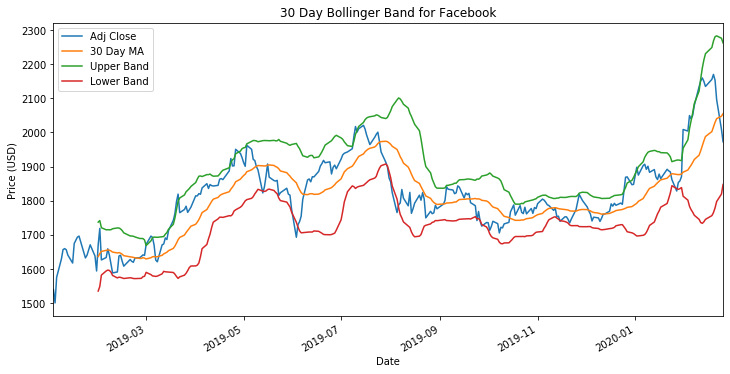

No handles with labels found to put in legend.


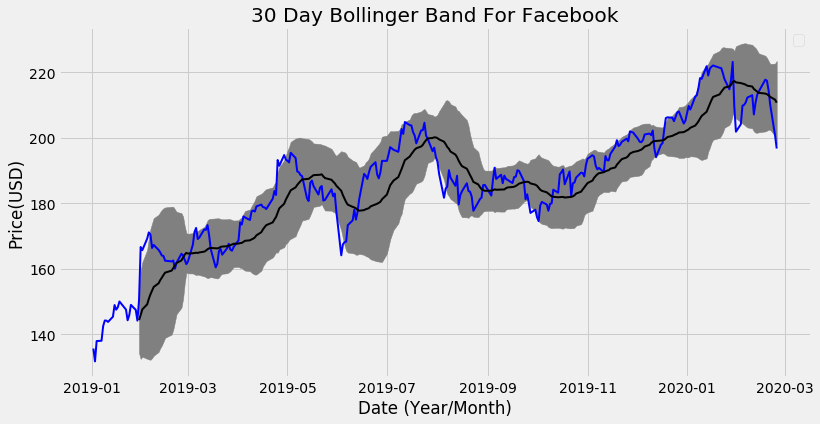

In [0]:
# import needed libraries

## Excellent Github tutorial : https://github.com/PyDataBlog/Python-for-Data-Science/tree/master/Tutorials
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
fb = get_adj_close('fb', '1/2/2019', '02/25/2020')
tesla = get_adj_close('tsla', '1/2/2019', '02/25/2020')
amazon = get_adj_close('amzn', '1/2/2019', '02/25/2020')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
item[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show()

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = fb.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, fb['Upper Band'], fb['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, fb['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, fb['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

In [0]:
!pip install quandl

  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=31c07e1e6f625baff4f9e988714465900062c5df179a28889991732cd2ee0d1c
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


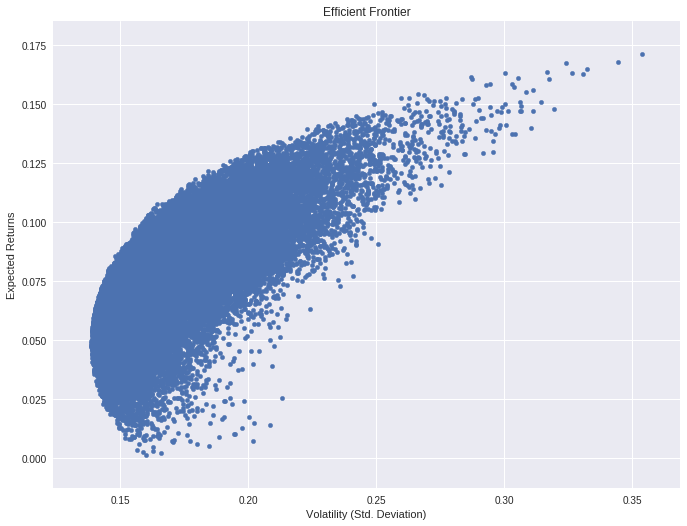

In [0]:
# # import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    

    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

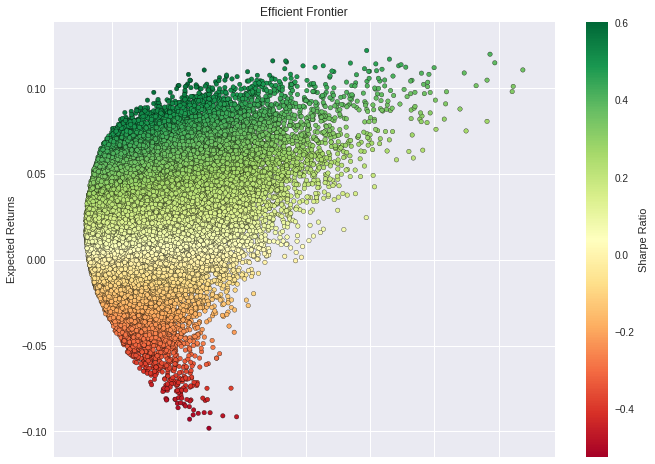

In [0]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']

data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2015-1-1', 'lte': '2020-1-1' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')

table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250


# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [0]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

In [0]:
table = data[0]
table

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,NaN
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,NaN
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,NaN


In [0]:
# Import the Python's number crunchers

from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

# Pull Adjusted closing prices for the portfolio (consisting of 5 stocks) we want to construct

# assets =  ['DMGGF',  'HVBTF', 'KBEVF']
assets =  [ 'MSFT']    #['NXP']
# assets =  [ 'AAPL','ADBE','CVX','GOOG','IBM','MDLZ','MSFT','NFLX','ORCL','SBUX']
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',start='2020-1-1' ,end='2020-2-1')['Adj Close']

# df[stock]

# Check the daily returns
d_returns = df.pct_change()
# d_returns.head()


# Construct a covariance matrix for the portfolio's daily returns with the .cov() method
cov_matrix_d = d_returns.cov()
# cov_matrix_d

# Annualise the daily covariance matrix with the standard 250 trading days
cov_matrix_a = cov_matrix_d * 250
# cov_matrix_a


# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 

# weights = np.array([0.2, 0.2, 0.2])
weights = np.array([1])
# weights


# Calculate the variance with the formula
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
# port_variance

# Just converting the variance float into a percentage

print('Variance:--> '+  str(round(port_variance, 4) * 100) + '%')

# The standard deviation of a portfolio is just a square root of its variance

port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
print('StandardDeviation:--> '+ str(round(port_volatility, 4) * 100) + '%')

# Proof that Standard deviation of a portfolio is just a square root of its variance
np.dot(weights.T, np.dot(cov_matrix_a, weights)) ** 0.5
# correlation matrix of daily returns

# d_returns.corr()


Variance:--> 4.21%
StandardDeviation:--> 20.51%


0.20507531129080747

Risk:--> 1.3%
Returns:--> 0.3%
Myportfolio:--->700000$
Yearly Return:--> 2092.469413153972$
Monthly value:--> 174.372$


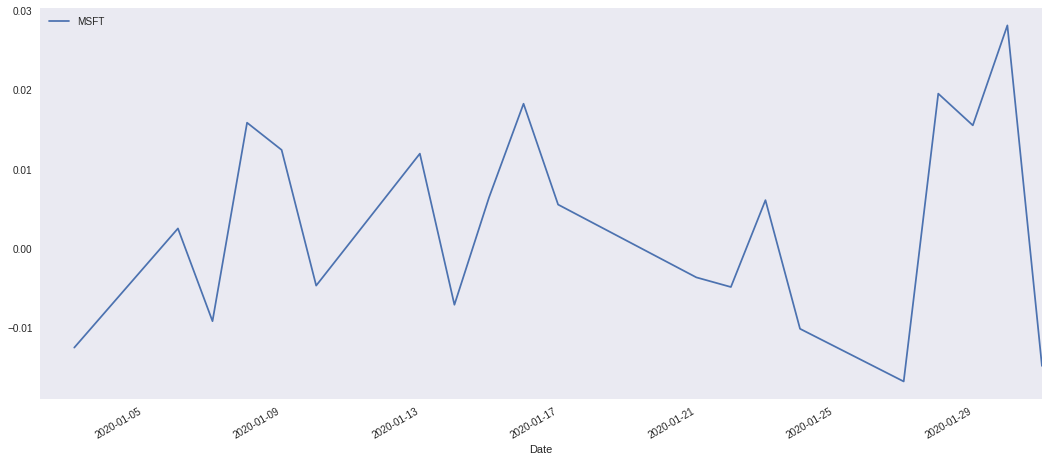

In [0]:
# basic stats on daily returns

d_returns.describe()
d_returns.plot(figsize=(16,8))
# annual standard deviation of Apple stock 
Annuaret= d_returns['MSFT'].std() ##* np.sqrt(250)
print('Risk:--> '+ str(round(Annuaret, 3) * 100) + '%')

# annualise daily returns. 250 trading days in a year
annual_returns = d_returns['MSFT'].mean()

print('Returns:--> '+ str(round(annual_returns, 3) * 100) + '%')


#Sample portfolio-
Myportfolio = 700000
calulcatedreturn = (Myportfolio * annual_returns) / 100
print( 'Myportfolio:--->'+ str(Myportfolio) + '$')
print('Yearly Return:--> '+ str((calulcatedreturn*100) * 1) + '$')

Monthreturn = calulcatedreturn *100/ 12
print('Monthly value:--> '+ str(round(Monthreturn, 3) * 1) + '$')


In [0]:
d_returns.describe

<bound method NDFrame.describe of                 MSFT
Date                
2019-01-02       NaN
2019-01-03 -0.036788
2019-01-04  0.046509
2019-01-07  0.001275
2019-01-08  0.007251
...              ...
2020-01-27 -0.016723
2020-01-28  0.019596
2020-01-29  0.015593
2020-01-30  0.028208
2020-01-31 -0.014759

[273 rows x 1 columns]>

In [0]:
!pip install quandl
import quandl 

In [0]:
quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
df = quandl.get_table('SHARADAR/SF1', calendardate='2018-12-31', ticker='MSFT')

In [0]:
df

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,deposits,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,ebt,eps,epsdil,epsusd,equity,equityavg,...,netinc,netinccmn,netinccmnusd,netincdis,netincnci,netmargin,opex,opinc,payables,payoutratio,pb,pe,pe1,ppnenet,prefdivis,price,ps,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharefactor,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,MSFT,MRY,2018-12-31,2018-06-30,2018-06-30,2020-01-29,-2187000000,258848000000,252361250000,169662000000,89186000000,0.437,10.743,-11632000000,133768000000,133768000000,38353000000,16571000000,2.901,2.129,81808000000,3998000000,77810000000,81808000000,32720000000,10261000000,0,0.017,1.65,36474000000,46735000000,0.423,46735000000,36474000000,36474000000,2.15,2.13,2.15,82718000000,82491000000,...,16571000000,16571000000,16571000000,0,0,0.15,36949000000,35058000000,8617000000,0.767,9.159,45.721,45.865,36146000000,0,98.61,6.865,6.88,26481000000,13682000000,110360000000,110360000000,14726000000,0.066,0.201,0.346,0.331,3940000000,22223000000,1.0,7683197503,7700000000,7794000000,14.332,215112000000,0,19903000000,32927000000,27.937,111174000000


In [1]:
!pip install quandl

  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=752716f64af238c47dc4d92f328fd7e74c8646056bf31fcffe8013484c00528c
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
import quandl 
quandl.ApiConfig.api_key = 'VjNwisks-7VKb4oHznDd'
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

In [3]:
# Return first rows of `aapl`
aapl.head()

# Return last rows of `aapl`
aapl.tail()

# Describe `aapl`
aapl.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


In [6]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
# type(ts)
ts

Date
2011-12-16    381.020
2011-12-19    382.210
2011-12-20    395.950
2011-12-21    396.445
2011-12-22    398.550
2011-12-23    403.330
2011-12-27    406.530
2011-12-28    402.640
2011-12-29    405.120
2011-12-30    405.000
Name: Close, dtype: float64

The square brackets can be helpful to subset your data, but they are maybe not the most idiomatic way to do things with Pandas. That’s why you should also take a look at the loc() and iloc() functions: you use the former for label-based indexing and the latter for positional indexing.

In practice, this means that you can pass the label of the row labels, such as 2007 and 2006-11-01, to the loc() function, while you pass integers such as 22 and 43 to the iloc() function.

Complete the exercise below to understand how both loc() and iloc() work:

In [8]:
import pandas as pd

# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                              ...                                    
2006-11-01  81.100  81.38  78.36  ...  10.070352   10.173163  152798100.0
2006-11-02  78.915  79.32  78.50  ...  10.088344   10.150031  116370800.0
2006-11-03  79.360  79.53  77.79  ...   9.997099   10.061356  107972200.0
2006-11-06  78.950  80.06  78.43  ...  10.079348   10.243846  108644200.0
2006-11-07  80.450  81.00  80.13  ...  10.297822   10.346657  131483100.0

[5 rows x 12 columns]
             Open   High    Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                             ...                                    
2007-01-03  86.29  86.58  81.90  ...  10.525291   10.769468  309579900.0
2007-01-04  84.05  85.95  83.82  ...  10.772038   11.008504  211815100.0
2007-01-05  85.77  86.20  84.40  ...  10.846576   10.930110  208685400.0
2007-01-08  85.96  86.53  85.28  ...  10.959669   10.984086  199276700.0
2007-01-09  86.45  92

Besides indexing, you might also want to explore some other techniques to get to know your data a little bit better. You never know what else will show up. Let’s try to sample some 20 rows from the data set and then let’s resample the data so that aapl is now at the monthly level instead of daily. You can make use of the sample() and resample() functions to do this:

In [9]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

# Print `monthly_aapl`
print(monthly_aapl)

                Open    High      Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                                   ...                                    
2010-08-25  238.0400  243.99  237.200  ...  30.483506   31.214750  149216900.0
2007-07-23  143.3100  145.22  140.930  ...  18.111469   18.467453  259122500.0
2011-04-12  330.4900  333.73  330.200  ...  42.435302   42.718033  106409800.0
2009-12-31  213.1300  213.35  210.560  ...  27.059895   27.081999   88102700.0
2008-04-07  156.1300  159.69  155.110  ...  19.933797   20.034038  289581600.0
2011-08-05  380.4400  383.50  362.570  ...  46.595298   48.015377  301147700.0
2007-03-07   88.0500   88.97   87.450  ...  11.238544   11.273243  156571100.0
2010-10-06  289.5900  291.99  285.260  ...  36.659886   37.164946  167717200.0
2010-02-17  204.1900  204.31  200.860  ...  25.813310   26.030498  109099200.0
2009-04-27  122.9000  125.00  122.660  ...  15.763520   16.029543  120172500.0
2009-07-10  136.3400  138.97  136.320  ...  17.51902

In [13]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


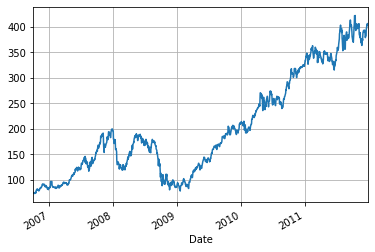

In [14]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

Returns
The simple daily percentage change doesn’t take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading. You will find that the daily percentage change is easily calculated, as there is a pct_change() function included in the Pandas package to make your life easier:

In [17]:
# Import `numpy` as `np`
import numpy as np

# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_change)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
...                ...
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296

[1323 rows x 1 columns]
            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
...                ...
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006140
2011-12-30   -0.000296

[1323 rows x 1 columns]


Note that you calculate the log returns to get a better insight into the growth of your returns over time.

Knowing how to calculate the daily percentage change is nice, but what when you want to know the monthly or quarterly returns? In such cases, you can fall back on the resample(), which you already saw in the first part of this tutorial.

In [18]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values at the beginning of the resulting DataFrame.

Tip: compare the result of the following code with the result that you had obtained in the first DataCamp Light chunk to clearly see the difference between these two methods of calculating the daily percentage change.

In [19]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
...                ...
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296

[1323 rows x 1 columns]


Tip: calculate the daily log returns with the help of Pandas’ shift() function. Try it out in the IPython console of this DataCamp Light chunk! (For those who can’t find the solution, try out this line of code: daily_log_returns_shift = np.log(daily_close / daily_close.shift(1))).

For your reference, the calculation of the daily percentage change is based on the following formula: rt=ptpt−1−1, where p is the price, t is the time (a day in this case) and r is the return.

Additionally, you can plot the distribution of daily_pct_change:

The distribution looks very symmetrical and normally distributed: the daily changes center around the bin 0.00. Note, though, how you can and should use the results of the describe() function, applied on daily_pct_c, to correctly interpret the results of the histogram. You will see that the mean is very close to the 0.00 bin also and that the standard deviation is 0.02. Also, take a look at the percentiles to know how many of your data points fall below -0.010672, 0.001677 and 0.014306.

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. You can calculate the cumulative daily rate of return by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:

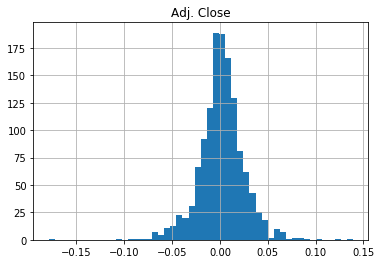

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [20]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

In [21]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
...                ...
2011-12-23    5.387791
2011-12-27    5.430537
2011-12-28    5.378573
2011-12-29    5.411702
2011-12-30    5.410099

[1323 rows x 1 columns]


Note that you can use can again use Matplotlib to quickly plot the cum_daily_return; Just add the plot() function to it and, optionally, determine the figsize or the size of the figure:

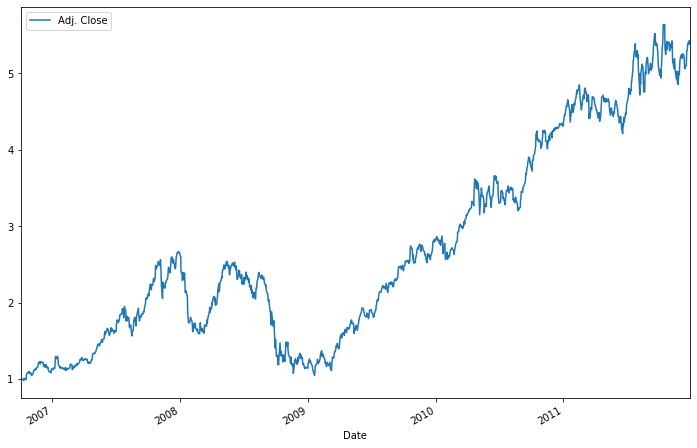

In [22]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

Very easy, isn’t it? Now, if you don’t want to see the daily returns, but rather the monthly returns, remember that you can easily use the resample() function to bring the cum_daily_return to the monthly level:

In [23]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
...                ...
2011-08-31    5.032896
2011-09-30    5.243031
2011-10-31    5.306305
2011-11-30    5.140465
2011-12-31    5.248868

[63 rows x 1 columns]


Knowing how to calculate the returns is a valuable skill, but you’ll often see that these numbers don’t really say much when you don’t compare them to other stock. That’s why you’ll often see examples where two or more stocks are compared. In the rest of this section, you’ll focus on getting more data from Yahoo! Finance so that you can calculate the daily percentage change and compare the results.

Note that, if you want to be doing this, you’ll need to have a more thorough understanding of Pandas and how you can manipulate your data with Pandas!

Let’s start! Get more data from Yahoo! Finance first. You can easily do this by making a function that takes in the ticker or symbol of the stock, a start date and an end date. The next function that you see, data(), then takes the ticker to get your data from the startdate to the enddate and returns it so that the get() function can continue. You map the data with the right tickers and return a DataFrame that concatenates the mapped data with tickers.

Check out the code below, where the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame:

In [0]:
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [0]:
import datetime
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))